In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values present in the dataset.

Apart from LoanAmount, all other columns having null values are continuous in nature. Therefore, we will replace them using mode() function.

In [6]:
a = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']


for i in a:
    data[i].fillna(data[i].mode()[0], inplace = True)

In [7]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())

In [8]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now, there is no Null values in the dataset.

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


### UniVariate Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

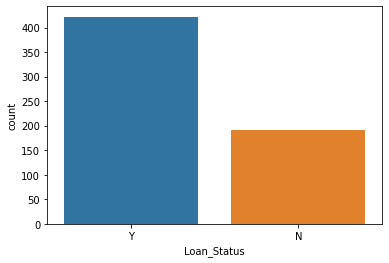

In [10]:
sns.countplot(data['Loan_Status'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

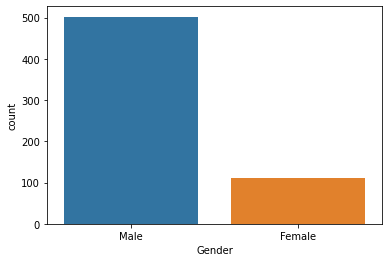

In [11]:
sns.countplot(data['Gender'])

<AxesSubplot:xlabel='Married', ylabel='count'>

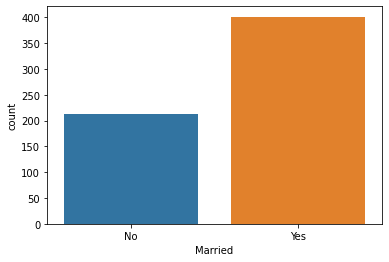

In [12]:
sns.countplot(data['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

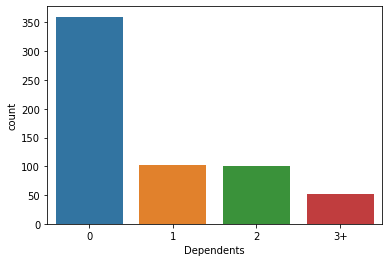

In [13]:
sns.countplot(data['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='count'>

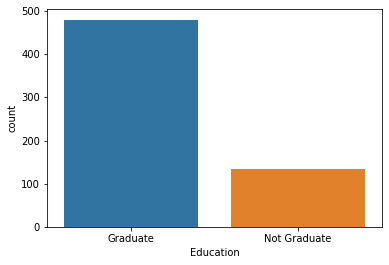

In [14]:
sns.countplot(data['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

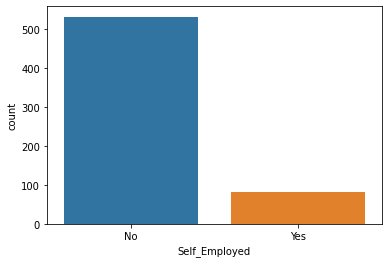

In [15]:
sns.countplot(data['Self_Employed'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

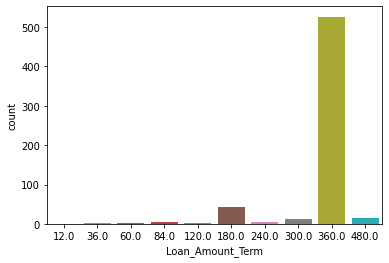

In [16]:
sns.countplot(data['Loan_Amount_Term'])

The Majority of Loan Amount Term is 360 months.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

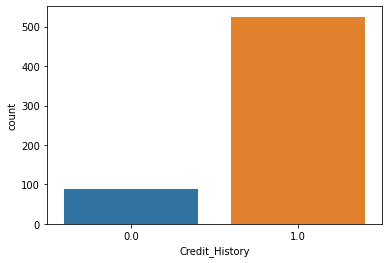

In [17]:
sns.countplot(data['Credit_History'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

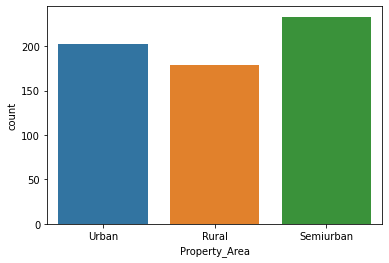

In [18]:
sns.countplot(data['Property_Area'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

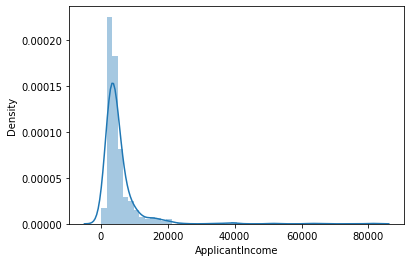

In [19]:
sns.distplot(data['ApplicantIncome'])

Majority of Applicant's income lies near to zero.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

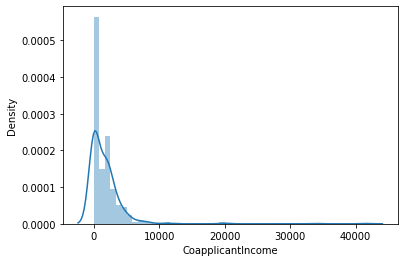

In [20]:
sns.distplot(data['CoapplicantIncome'])

CoapplicantIncome trend is same as ApplicantIncome.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

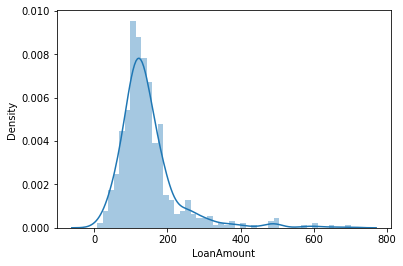

In [21]:
sns.distplot(data['LoanAmount'])

Loan Amount data seems to be left skewed, with majority of values lies in 0 to 200 range.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

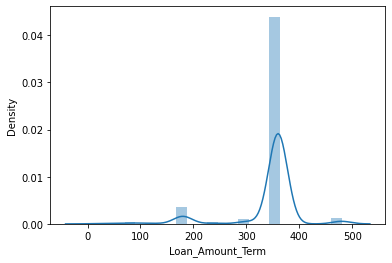

In [22]:
sns.distplot(data['Loan_Amount_Term'])

As we have seen earlier, the Majority of Loan_Amount_Term lies to 360.

### Bi-Variate Analysis

In [23]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

data['Loan_Status'] = enc.fit_transform(data['Loan_Status'])

data['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Loan_Status'>

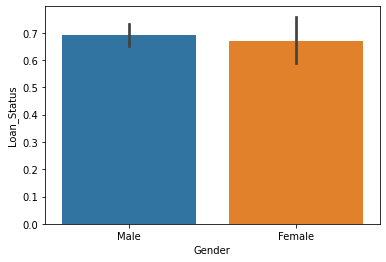

In [24]:
sns.barplot(x = 'Gender', y = 'Loan_Status', data=data)

Loan_Status does not depends much on gender, as it is almost same for both male and female.

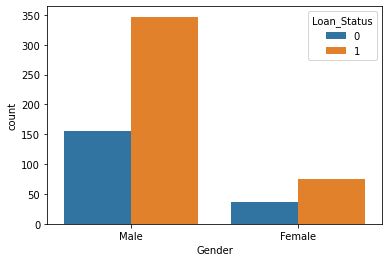

In [25]:
sns.countplot(data['Gender'], hue=data['Loan_Status'])
plt.show()

<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

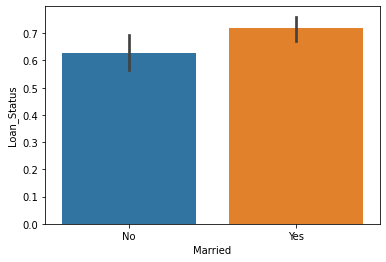

In [26]:
sns.barplot(x = 'Married', y = 'Loan_Status', data=data)

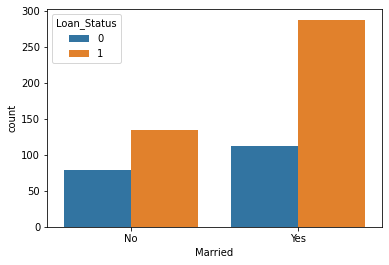

In [27]:
sns.countplot(data['Married'], hue=data['Loan_Status'])
plt.show()

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Status'>

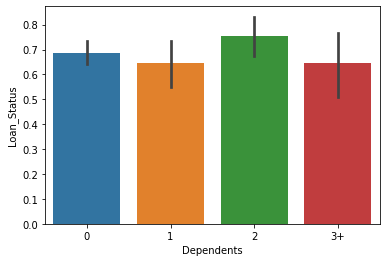

In [28]:
sns.barplot(x = 'Dependents', y = 'Loan_Status', data=data)

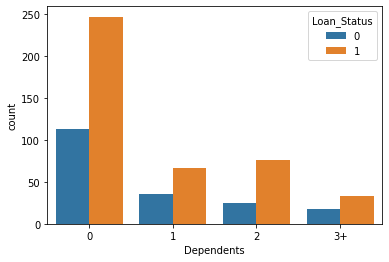

In [29]:
sns.countplot(data['Dependents'], hue=data['Loan_Status'])
plt.show()

<AxesSubplot:xlabel='Education', ylabel='Loan_Status'>

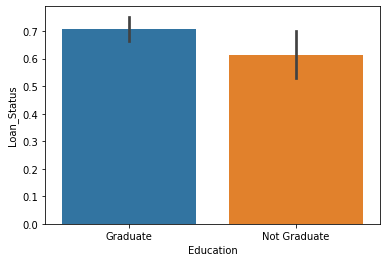

In [30]:
sns.barplot(x = 'Education', y = 'Loan_Status', data=data)

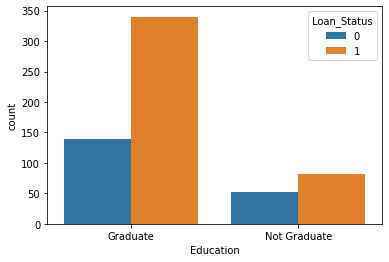

In [31]:
sns.countplot(data['Education'], hue=data['Loan_Status'])
plt.show()

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Status'>

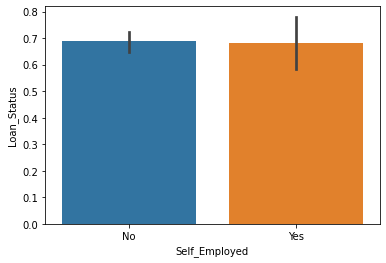

In [32]:
sns.barplot(x = 'Self_Employed', y = 'Loan_Status', data=data)

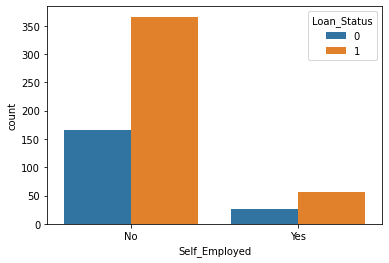

In [33]:
sns.countplot(data['Self_Employed'], hue=data['Loan_Status'])
plt.show()

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Loan_Status'>

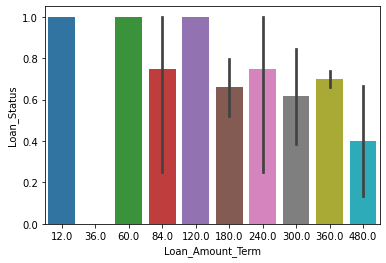

In [34]:
sns.barplot(x = 'Loan_Amount_Term', y = 'Loan_Status', data=data)

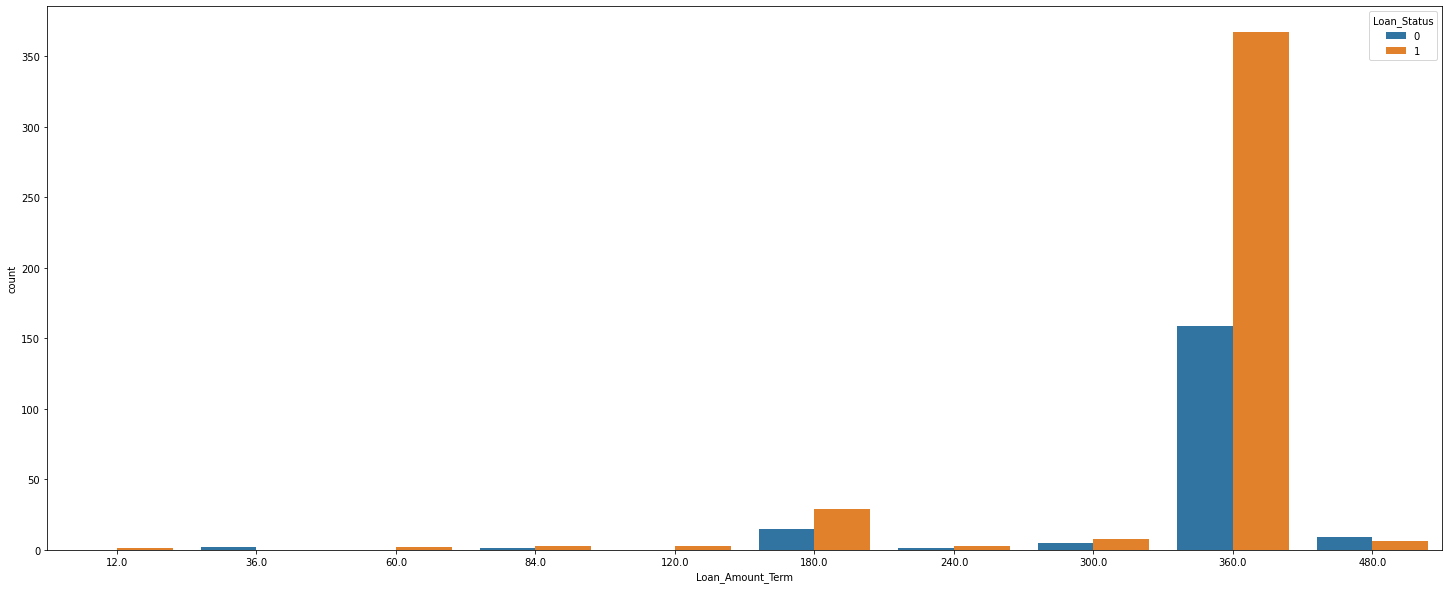

In [35]:
plt.figure(figsize = (25, 10))
sns.countplot(data['Loan_Amount_Term'], hue=data['Loan_Status'])
plt.show()

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

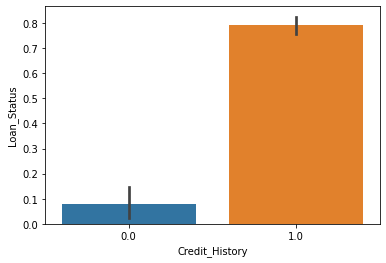

In [36]:
sns.barplot(x = 'Credit_History', y = 'Loan_Status', data=data)

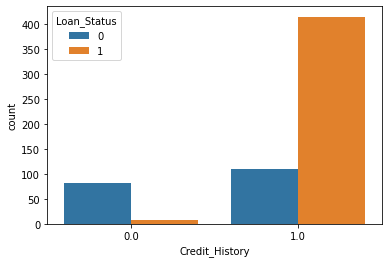

In [37]:
sns.countplot(data['Credit_History'], hue=data['Loan_Status'])
plt.show()

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Status'>

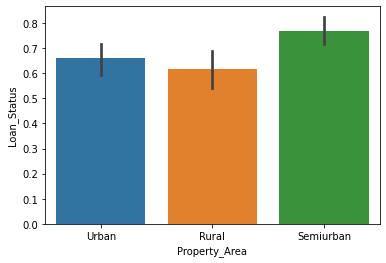

In [38]:
sns.barplot(x = 'Property_Area', y = 'Loan_Status', data=data)

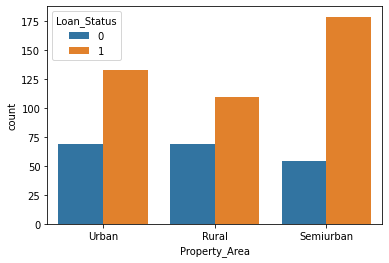

In [39]:
sns.countplot(data['Property_Area'], hue=data['Loan_Status'])
plt.show()

### Encoding the categorical Data

In [40]:
data = data.drop(['Loan_ID'], axis=1)

In [41]:
# Encoding Dataset

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

elements = data.select_dtypes(include=['object']).columns

elements

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [42]:
for i in elements:
    data[i] = enc.fit_transform(data[i])

In [43]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


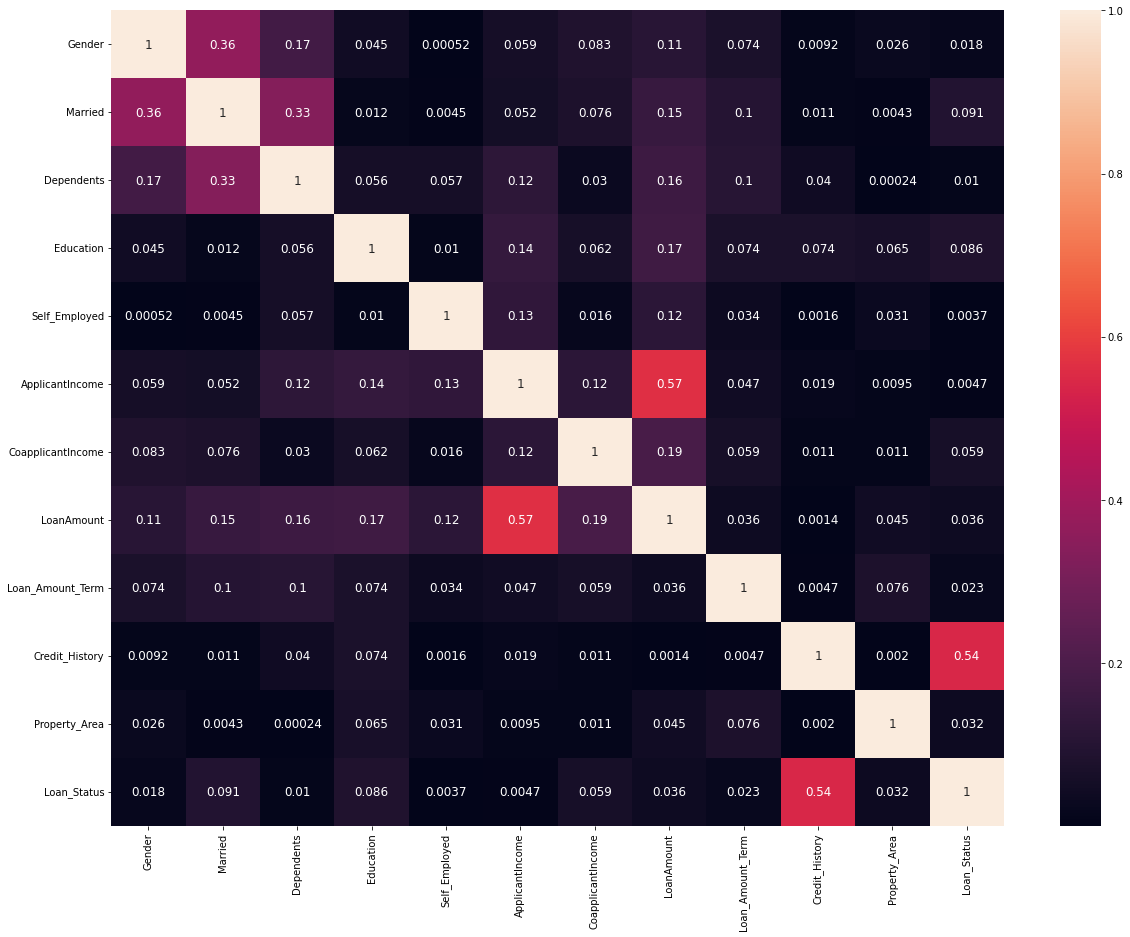

In [44]:
data_corr = data.corr().abs()

plt.figure(figsize = (20,15))
sns.heatmap(data_corr, annot = True, annot_kws={'size':12})
plt.show()

The highest value for correlation is 0.57, for ApplicantIncome & LoanAmount, which can be considered as a strong correlation.

Therefore it seems, there is no multicollinearity present in the dataset.

We will check the same using VIF.

### Checking Skewness

In [45]:
x = data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']

In [46]:
print(x.shape)
print(y.shape)

(614, 11)
(614,)


In [47]:
x.skew().sort_values(ascending = False)

CoapplicantIncome    7.491531
ApplicantIncome      6.539513
LoanAmount           2.726601
Self_Employed        2.159796
Education            1.367622
Dependents           1.015551
Property_Area       -0.066196
Married             -0.644850
Gender              -1.648795
Credit_History      -2.021971
Loan_Amount_Term    -2.402112
dtype: float64

As we have earlier seen in dist plot, there is skewness present in columns. Therefore, we will use power transformation to remove skewness.

In [48]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [49]:
pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

Self_Employed        2.159796
Education            1.367622
Dependents           0.441404
Loan_Amount_Term     0.392571
LoanAmount           0.024376
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
Property_Area       -0.158267
Married             -0.644850
Gender              -1.648795
Credit_History      -2.021971
dtype: float64

Skewness Values is high for Categorical data, which does not need any transformation. Therefore, we can proceed ahead with our dataset.

In [50]:
x = pd.DataFrame(x_new, columns = x.columns)

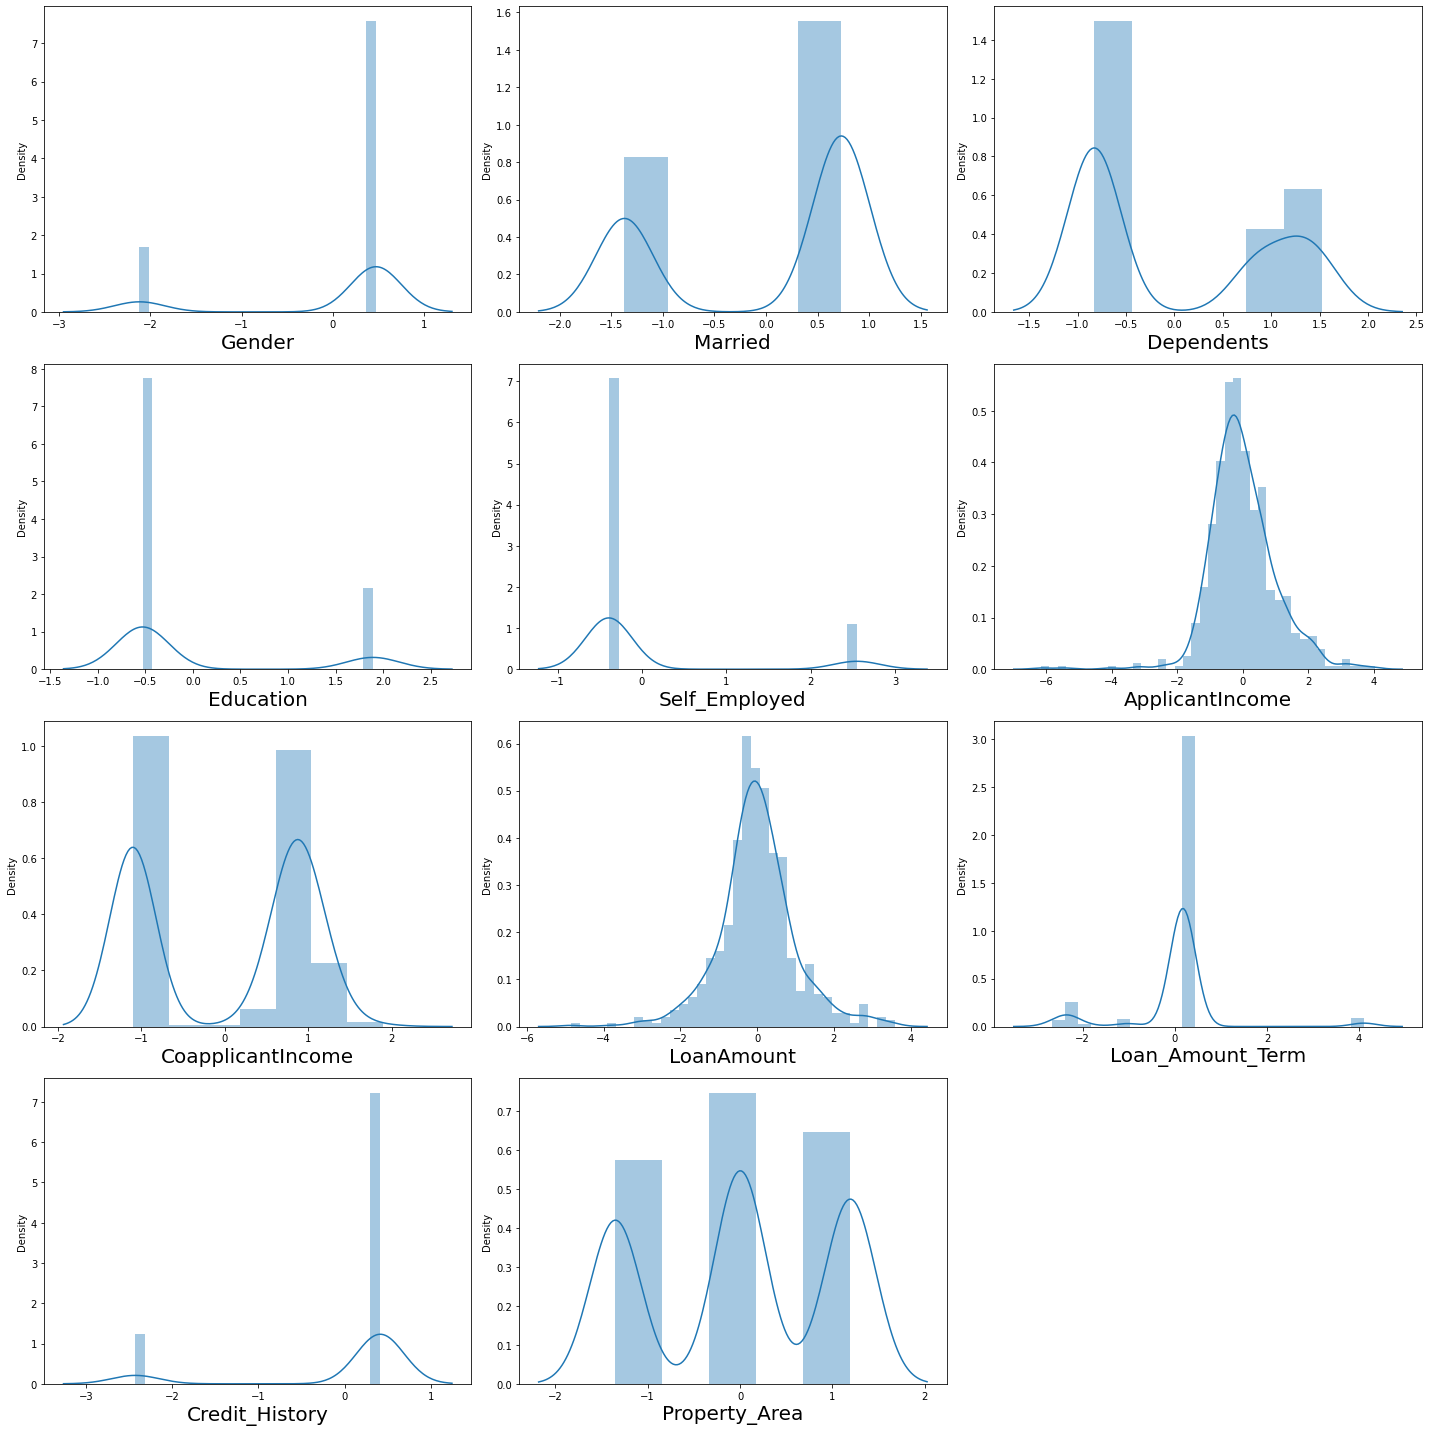

In [51]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in x:
    if plotnumber <= 12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

Compared to earlier graphs, Now the dataset looks more normalized.

### Checking Outliers

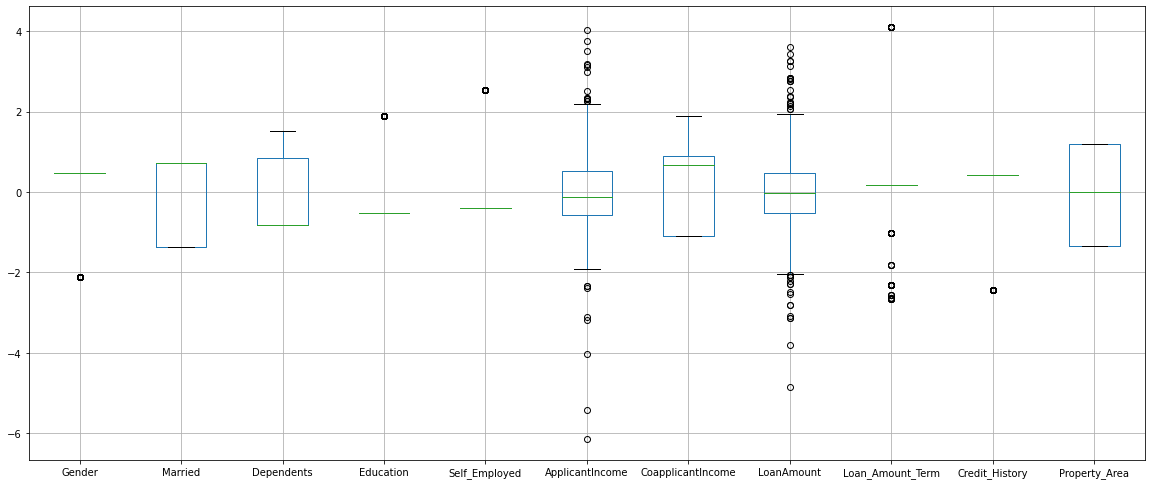

In [52]:
x.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [53]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Gender                True
Married               True
Dependents            True
Education             True
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome     True
LoanAmount           False
Loan_Amount_Term     False
Credit_History        True
Property_Area         True
dtype: bool
****************************************
Low Side Outliers Present
Gender                True
Married               True
Dependents            True
Education             True
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome     True
LoanAmount           False
Loan_Amount_Term      True
Credit_History        True
Property_Area         True
dtype: bool


Features having outliers in High Side are: 1. ApplicantIncome, 2. LoanAmount

Features having outliers in Low side are: 1. ApplicantIncome, 2. LoanAmount

Loan_Amount_Term is a column with categorical data in nature. Therefore, we can not consider this as outlier value.

In [54]:
# Validating OUtliers

#1st Quantile
q1 = x.quantile(0.25)

#3rd quantile
q3 = x.quantile(0.75)

#IQR
iqr = q3 - q1

In [55]:
ApplicantIncome_high = q3.ApplicantIncome + (1.5 * iqr.ApplicantIncome)

# Check the Indexes which have higher values

index1 = np.where(x['ApplicantIncome']> ApplicantIncome_high)

x = x.drop(x['ApplicantIncome'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(600, 11)
(600,)


In [56]:
LoanAmount_high = q3.LoanAmount + (1.5 * iqr.LoanAmount)

# Check the Indexes which have higher values

index1 = np.where(x['LoanAmount']> LoanAmount_high)

x = x.drop(x['LoanAmount'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(589, 11)
(589,)


In [57]:
ApplicantIncome_low = q1.ApplicantIncome - (1.5 * iqr.ApplicantIncome)

# Check the Indexes which have higher values

index1 = np.where(x['ApplicantIncome']< ApplicantIncome_low)

x = x.drop(x['ApplicantIncome'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(582, 11)
(582,)


In [58]:
LoanAmount_low = q1.LoanAmount - (1.5 * iqr.LoanAmount)

# Check the Indexes which have higher values

index1 = np.where(x['LoanAmount']< LoanAmount_low)

x = x.drop(x['LoanAmount'].index[index1])

y = y.drop(y.index[index1])

print(x.shape)
print(y.shape)

(566, 11)
(566,)


In [59]:
# Percentage Loss of Data

Data_loss = ((614-566)/614)*100

Data_loss

7.81758957654723

Only around 8% data is lost after removal of Outliers.

In [60]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Gender                True
Married               True
Dependents            True
Education             True
Self_Employed         True
ApplicantIncome       True
CoapplicantIncome     True
LoanAmount            True
Loan_Amount_Term     False
Credit_History        True
Property_Area         True
dtype: bool
****************************************
Low Side Outliers Present
Gender               True
Married              True
Dependents           True
Education            True
Self_Employed        True
ApplicantIncome      True
CoapplicantIncome    True
LoanAmount           True
Loan_Amount_Term     True
Credit_History       True
Property_Area        True
dtype: bool


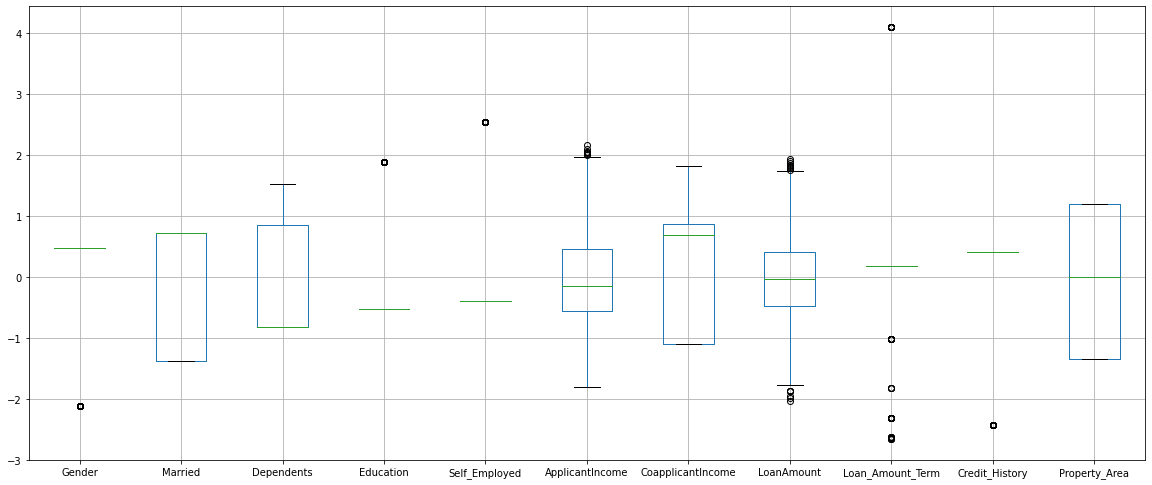

In [61]:
x.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

Now since Outliers are removed from the Dataset, we can proceed ahead.

### Checking Multicollinearity

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,1.197577,Gender
1,1.415210,Married
2,1.193961,Dependents
3,1.065112,Education
4,1.068412,Self_Employed
5,1.947912,ApplicantIncome
6,1.624747,CoapplicantIncome
7,1.634520,LoanAmount
8,1.035360,Loan_Amount_Term
9,1.009938,Credit_History


All columns are having VIF values around 1, which means there is no correlation exists between the features.

## Model Building

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

In [66]:
maxAccu = 0
maxRS = 0

model = [LogisticRegression(),
         RandomForestClassifier(),
         DecisionTreeClassifier(),
         KNeighborsClassifier(),
         xgb.XGBClassifier()]

for rs in range(1,1000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = rs)
    for i in model:
        i.fit(x_train, y_train)
        y_pred = i.predict(x_test)
        acc = accuracy_score(y_test,y_pred)
        print('Accuracy score', acc, 'random_state', rs, 'Model', i)
        if acc > maxAccu:
            maxAccu = acc
            maxRS = rs
            final_model = i
            
        
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', i)

Accuracy score 0.8380281690140845 random_state 1 Model LogisticRegression()
Accuracy score 0.795774647887324 random_state 1 Model RandomForestClassifier()
Accuracy score 0.7816901408450704 random_state 1 Model DecisionTreeClassifier()
Accuracy score 0.8169014084507042 random_state 1 Model KNeighborsClassifier()
Accuracy score 0.795774647887324 random_state 1 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='aut

Accuracy score 0.8169014084507042 random_state 9 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7816901408450704 random_state 10 Model LogisticRegression()
Accuracy score 0.7464788732394366 random_state 10 Model RandomForestClassifier()
Accuracy score 0.6971830985915493 random_state 10 Model DecisionTreeClassifier()
Accurac

Accuracy score 0.8028169014084507 random_state 17 Model LogisticRegression()
Accuracy score 0.7887323943661971 random_state 17 Model RandomForestClassifier()
Accuracy score 0.6830985915492958 random_state 17 Model DecisionTreeClassifier()
Accuracy score 0.7676056338028169 random_state 17 Model KNeighborsClassifier()
Accuracy score 0.7394366197183099 random_state 17 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predict

Accuracy score 0.7887323943661971 random_state 25 Model RandomForestClassifier()
Accuracy score 0.7323943661971831 random_state 25 Model DecisionTreeClassifier()
Accuracy score 0.8028169014084507 random_state 25 Model KNeighborsClassifier()
Accuracy score 0.7605633802816901 random_state 25 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accu

Accuracy score 0.795774647887324 random_state 33 Model KNeighborsClassifier()
Accuracy score 0.823943661971831 random_state 33 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8661971830985915 random_state 34 Model LogisticRegression()
Accuracy score 0.8098591549295775 random_state 34 Model RandomForestClassifier()
Accuracy s

Accuracy score 0.795774647887324 random_state 42 Model RandomForestClassifier()
Accuracy score 0.676056338028169 random_state 42 Model DecisionTreeClassifier()
Accuracy score 0.795774647887324 random_state 42 Model KNeighborsClassifier()
Accuracy score 0.7183098591549296 random_state 42 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accurac

Accuracy score 0.7394366197183099 random_state 50 Model DecisionTreeClassifier()
Accuracy score 0.8450704225352113 random_state 50 Model KNeighborsClassifier()
Accuracy score 0.8450704225352113 random_state 50 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8028169014084507 random_state 51 Model LogisticRegression()
Accuracy

Accuracy score 0.7746478873239436 random_state 59 Model LogisticRegression()
Accuracy score 0.7746478873239436 random_state 59 Model RandomForestClassifier()
Accuracy score 0.704225352112676 random_state 59 Model DecisionTreeClassifier()
Accuracy score 0.7816901408450704 random_state 59 Model KNeighborsClassifier()
Accuracy score 0.7394366197183099 random_state 59 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predicto

Accuracy score 0.8169014084507042 random_state 67 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8169014084507042 random_state 68 Model LogisticRegression()
Accuracy score 0.795774647887324 random_state 68 Model RandomForestClassifier()
Accuracy score 0.7394366197183099 random_state 68 Model DecisionTreeClassifier()
Accurac

Accuracy score 0.7746478873239436 random_state 75 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8169014084507042 random_state 76 Model LogisticRegression()
Accuracy score 0.7887323943661971 random_state 76 Model RandomForestClassifier()
Accuracy score 0.7183098591549296 random_state 76 Model DecisionTreeClassifier()
Accura

Accuracy score 0.823943661971831 random_state 84 Model LogisticRegression()
Accuracy score 0.8098591549295775 random_state 84 Model RandomForestClassifier()
Accuracy score 0.7112676056338029 random_state 84 Model DecisionTreeClassifier()
Accuracy score 0.8169014084507042 random_state 84 Model KNeighborsClassifier()
Accuracy score 0.7816901408450704 random_state 84 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predicto

Accuracy score 0.795774647887324 random_state 92 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8098591549295775 random_state 93 Model LogisticRegression()
Accuracy score 0.8098591549295775 random_state 93 Model RandomForestClassifier()
Accuracy score 0.6830985915492958 random_state 93 Model DecisionTreeClassifier()
Accurac

Accuracy score 0.7605633802816901 random_state 100 Model DecisionTreeClassifier()
Accuracy score 0.7676056338028169 random_state 100 Model KNeighborsClassifier()
Accuracy score 0.7816901408450704 random_state 100 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8098591549295775 random_state 101 Model LogisticRegression()
Accu

Accuracy score 0.795774647887324 random_state 109 Model RandomForestClassifier()
Accuracy score 0.7112676056338029 random_state 109 Model DecisionTreeClassifier()
Accuracy score 0.7746478873239436 random_state 109 Model KNeighborsClassifier()
Accuracy score 0.823943661971831 random_state 109 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Ac

Accuracy score 0.823943661971831 random_state 117 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8380281690140845 random_state 118 Model LogisticRegression()
Accuracy score 0.823943661971831 random_state 118 Model RandomForestClassifier()
Accuracy score 0.7746478873239436 random_state 118 Model DecisionTreeClassifier()
Accu

Accuracy score 0.823943661971831 random_state 125 Model RandomForestClassifier()
Accuracy score 0.7323943661971831 random_state 125 Model DecisionTreeClassifier()
Accuracy score 0.7887323943661971 random_state 125 Model KNeighborsClassifier()
Accuracy score 0.795774647887324 random_state 125 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Ac

Accuracy score 0.7464788732394366 random_state 133 Model DecisionTreeClassifier()
Accuracy score 0.7887323943661971 random_state 133 Model KNeighborsClassifier()
Accuracy score 0.8380281690140845 random_state 133 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.795774647887324 random_state 134 Model LogisticRegression()
Accur

Accuracy score 0.7746478873239436 random_state 141 Model RandomForestClassifier()
Accuracy score 0.676056338028169 random_state 141 Model DecisionTreeClassifier()
Accuracy score 0.7746478873239436 random_state 141 Model KNeighborsClassifier()
Accuracy score 0.7605633802816901 random_state 141 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.7746478873239436 random_state 149 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8028169014084507 random_state 150 Model LogisticRegression()
Accuracy score 0.7816901408450704 random_state 150 Model RandomForestClassifier()
Accuracy score 0.704225352112676 random_state 150 Model DecisionTreeClassifier()
Acc

Accuracy score 0.7535211267605634 random_state 157 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8732394366197183 random_state 158 Model LogisticRegression()
Accuracy score 0.8380281690140845 random_state 158 Model RandomForestClassifier()
Accuracy score 0.6408450704225352 random_state 158 Model DecisionTreeClassifier()
Ac

Accuracy score 0.7887323943661971 random_state 165 Model RandomForestClassifier()
Accuracy score 0.6619718309859155 random_state 165 Model DecisionTreeClassifier()
Accuracy score 0.7746478873239436 random_state 165 Model KNeighborsClassifier()
Accuracy score 0.8028169014084507 random_state 165 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.7816901408450704 random_state 173 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.795774647887324 random_state 174 Model LogisticRegression()
Accuracy score 0.795774647887324 random_state 174 Model RandomForestClassifier()
Accuracy score 0.6690140845070423 random_state 174 Model DecisionTreeClassifier()
Accu

Accuracy score 0.8098591549295775 random_state 181 Model RandomForestClassifier()
Accuracy score 0.8098591549295775 random_state 181 Model DecisionTreeClassifier()
Accuracy score 0.7746478873239436 random_state 181 Model KNeighborsClassifier()
Accuracy score 0.8661971830985915 random_state 181 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.7676056338028169 random_state 189 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8098591549295775 random_state 190 Model LogisticRegression()
Accuracy score 0.7887323943661971 random_state 190 Model RandomForestClassifier()
Accuracy score 0.6690140845070423 random_state 190 Model DecisionTreeClassifier()
Ac

Accuracy score 0.7464788732394366 random_state 197 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.795774647887324 random_state 198 Model LogisticRegression()
Accuracy score 0.7816901408450704 random_state 198 Model RandomForestClassifier()
Accuracy score 0.676056338028169 random_state 198 Model DecisionTreeClassifier()
Accu

Accuracy score 0.7676056338028169 random_state 205 Model RandomForestClassifier()
Accuracy score 0.6619718309859155 random_state 205 Model DecisionTreeClassifier()
Accuracy score 0.7887323943661971 random_state 205 Model KNeighborsClassifier()
Accuracy score 0.7535211267605634 random_state 205 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.7816901408450704 random_state 214 Model RandomForestClassifier()
Accuracy score 0.704225352112676 random_state 214 Model DecisionTreeClassifier()
Accuracy score 0.7394366197183099 random_state 214 Model KNeighborsClassifier()
Accuracy score 0.7464788732394366 random_state 214 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.704225352112676 random_state 222 Model DecisionTreeClassifier()
Accuracy score 0.795774647887324 random_state 222 Model KNeighborsClassifier()
Accuracy score 0.8309859154929577 random_state 222 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.795774647887324 random_state 223 Model LogisticRegression()
Accurac

Accuracy score 0.8169014084507042 random_state 231 Model RandomForestClassifier()
Accuracy score 0.7112676056338029 random_state 231 Model DecisionTreeClassifier()
Accuracy score 0.7816901408450704 random_state 231 Model KNeighborsClassifier()
Accuracy score 0.7464788732394366 random_state 231 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8169014084507042 random_state 239 Model RandomForestClassifier()
Accuracy score 0.7112676056338029 random_state 239 Model DecisionTreeClassifier()
Accuracy score 0.7816901408450704 random_state 239 Model KNeighborsClassifier()
Accuracy score 0.7535211267605634 random_state 239 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.7535211267605634 random_state 247 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.823943661971831 random_state 248 Model LogisticRegression()
Accuracy score 0.8098591549295775 random_state 248 Model RandomForestClassifier()
Accuracy score 0.7253521126760564 random_state 248 Model DecisionTreeClassifier()
Acc

Accuracy score 0.7253521126760564 random_state 255 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.823943661971831 random_state 256 Model LogisticRegression()
Accuracy score 0.8028169014084507 random_state 256 Model RandomForestClassifier()
Accuracy score 0.7394366197183099 random_state 256 Model DecisionTreeClassifier()
Acc

Accuracy score 0.7535211267605634 random_state 263 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8028169014084507 random_state 264 Model LogisticRegression()
Accuracy score 0.7676056338028169 random_state 264 Model RandomForestClassifier()
Accuracy score 0.7112676056338029 random_state 264 Model DecisionTreeClassifier()
Ac

Accuracy score 0.7323943661971831 random_state 271 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.823943661971831 random_state 272 Model LogisticRegression()
Accuracy score 0.8169014084507042 random_state 272 Model RandomForestClassifier()
Accuracy score 0.704225352112676 random_state 272 Model DecisionTreeClassifier()
Accu

Accuracy score 0.7394366197183099 random_state 279 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8028169014084507 random_state 280 Model LogisticRegression()
Accuracy score 0.7746478873239436 random_state 280 Model RandomForestClassifier()
Accuracy score 0.7676056338028169 random_state 280 Model DecisionTreeClassifier()
Ac

Accuracy score 0.8098591549295775 random_state 287 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8450704225352113 random_state 288 Model LogisticRegression()
Accuracy score 0.8169014084507042 random_state 288 Model RandomForestClassifier()
Accuracy score 0.704225352112676 random_state 288 Model DecisionTreeClassifier()
Acc

Accuracy score 0.704225352112676 random_state 295 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8098591549295775 random_state 296 Model LogisticRegression()
Accuracy score 0.795774647887324 random_state 296 Model RandomForestClassifier()
Accuracy score 0.704225352112676 random_state 296 Model DecisionTreeClassifier()
Accur

Accuracy score 0.7535211267605634 random_state 303 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8380281690140845 random_state 304 Model LogisticRegression()
Accuracy score 0.8169014084507042 random_state 304 Model RandomForestClassifier()
Accuracy score 0.6830985915492958 random_state 304 Model DecisionTreeClassifier()
Ac

Accuracy score 0.8028169014084507 random_state 311 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.795774647887324 random_state 312 Model LogisticRegression()
Accuracy score 0.7535211267605634 random_state 312 Model RandomForestClassifier()
Accuracy score 0.7253521126760564 random_state 312 Model DecisionTreeClassifier()
Acc

Accuracy score 0.7887323943661971 random_state 319 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7816901408450704 random_state 320 Model LogisticRegression()
Accuracy score 0.7887323943661971 random_state 320 Model RandomForestClassifier()
Accuracy score 0.6901408450704225 random_state 320 Model DecisionTreeClassifier()
Ac

Accuracy score 0.8028169014084507 random_state 327 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8028169014084507 random_state 328 Model LogisticRegression()
Accuracy score 0.7887323943661971 random_state 328 Model RandomForestClassifier()
Accuracy score 0.7183098591549296 random_state 328 Model DecisionTreeClassifier()
Ac

Accuracy score 0.7323943661971831 random_state 335 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.823943661971831 random_state 336 Model LogisticRegression()
Accuracy score 0.795774647887324 random_state 336 Model RandomForestClassifier()
Accuracy score 0.704225352112676 random_state 336 Model DecisionTreeClassifier()
Accur

Accuracy score 0.795774647887324 random_state 343 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.795774647887324 random_state 344 Model LogisticRegression()
Accuracy score 0.8028169014084507 random_state 344 Model RandomForestClassifier()
Accuracy score 0.7535211267605634 random_state 344 Model DecisionTreeClassifier()
Accu

Accuracy score 0.7676056338028169 random_state 351 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8028169014084507 random_state 352 Model LogisticRegression()
Accuracy score 0.7816901408450704 random_state 352 Model RandomForestClassifier()
Accuracy score 0.7112676056338029 random_state 352 Model DecisionTreeClassifier()
Ac

Accuracy score 0.7605633802816901 random_state 359 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.795774647887324 random_state 360 Model LogisticRegression()
Accuracy score 0.7816901408450704 random_state 360 Model RandomForestClassifier()
Accuracy score 0.7464788732394366 random_state 360 Model DecisionTreeClassifier()
Acc

Accuracy score 0.7676056338028169 random_state 367 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8169014084507042 random_state 368 Model LogisticRegression()
Accuracy score 0.7816901408450704 random_state 368 Model RandomForestClassifier()
Accuracy score 0.6971830985915493 random_state 368 Model DecisionTreeClassifier()
Ac

Accuracy score 0.7887323943661971 random_state 375 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8450704225352113 random_state 376 Model LogisticRegression()
Accuracy score 0.8380281690140845 random_state 376 Model RandomForestClassifier()
Accuracy score 0.7605633802816901 random_state 376 Model DecisionTreeClassifier()
Ac

Accuracy score 0.7183098591549296 random_state 383 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8028169014084507 random_state 384 Model LogisticRegression()
Accuracy score 0.7746478873239436 random_state 384 Model RandomForestClassifier()
Accuracy score 0.7253521126760564 random_state 384 Model DecisionTreeClassifier()
Ac

Accuracy score 0.7816901408450704 random_state 391 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8098591549295775 random_state 392 Model LogisticRegression()
Accuracy score 0.8028169014084507 random_state 392 Model RandomForestClassifier()
Accuracy score 0.7394366197183099 random_state 392 Model DecisionTreeClassifier()
Ac

Accuracy score 0.7676056338028169 random_state 399 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.823943661971831 random_state 400 Model LogisticRegression()
Accuracy score 0.8028169014084507 random_state 400 Model RandomForestClassifier()
Accuracy score 0.7253521126760564 random_state 400 Model DecisionTreeClassifier()
Acc

Accuracy score 0.7746478873239436 random_state 407 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7746478873239436 random_state 408 Model LogisticRegression()
Accuracy score 0.7746478873239436 random_state 408 Model RandomForestClassifier()
Accuracy score 0.6408450704225352 random_state 408 Model DecisionTreeClassifier()
Ac

Accuracy score 0.8028169014084507 random_state 415 Model RandomForestClassifier()
Accuracy score 0.7112676056338029 random_state 415 Model DecisionTreeClassifier()
Accuracy score 0.7676056338028169 random_state 415 Model KNeighborsClassifier()
Accuracy score 0.7816901408450704 random_state 415 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8309859154929577 random_state 423 Model RandomForestClassifier()
Accuracy score 0.7253521126760564 random_state 423 Model DecisionTreeClassifier()
Accuracy score 0.8098591549295775 random_state 423 Model KNeighborsClassifier()
Accuracy score 0.7676056338028169 random_state 423 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.6690140845070423 random_state 431 Model DecisionTreeClassifier()
Accuracy score 0.7323943661971831 random_state 431 Model KNeighborsClassifier()
Accuracy score 0.7394366197183099 random_state 431 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8098591549295775 random_state 432 Model LogisticRegression()
Accu

Accuracy score 0.6690140845070423 random_state 439 Model DecisionTreeClassifier()
Accuracy score 0.8169014084507042 random_state 439 Model KNeighborsClassifier()
Accuracy score 0.7605633802816901 random_state 439 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8098591549295775 random_state 440 Model LogisticRegression()
Accu

Accuracy score 0.7535211267605634 random_state 447 Model DecisionTreeClassifier()
Accuracy score 0.795774647887324 random_state 447 Model KNeighborsClassifier()
Accuracy score 0.7816901408450704 random_state 447 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.795774647887324 random_state 448 Model LogisticRegression()
Accura

Accuracy score 0.704225352112676 random_state 455 Model DecisionTreeClassifier()
Accuracy score 0.8098591549295775 random_state 455 Model KNeighborsClassifier()
Accuracy score 0.795774647887324 random_state 455 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8309859154929577 random_state 456 Model LogisticRegression()
Accura

Accuracy score 0.7253521126760564 random_state 463 Model DecisionTreeClassifier()
Accuracy score 0.7253521126760564 random_state 463 Model KNeighborsClassifier()
Accuracy score 0.7394366197183099 random_state 463 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7887323943661971 random_state 464 Model LogisticRegression()
Accu

Accuracy score 0.6971830985915493 random_state 471 Model DecisionTreeClassifier()
Accuracy score 0.8169014084507042 random_state 471 Model KNeighborsClassifier()
Accuracy score 0.7605633802816901 random_state 471 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8028169014084507 random_state 472 Model LogisticRegression()
Accu

Accuracy score 0.7394366197183099 random_state 479 Model DecisionTreeClassifier()
Accuracy score 0.8591549295774648 random_state 479 Model KNeighborsClassifier()
Accuracy score 0.8450704225352113 random_state 479 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.852112676056338 random_state 480 Model LogisticRegression()
Accur

Accuracy score 0.704225352112676 random_state 487 Model DecisionTreeClassifier()
Accuracy score 0.7676056338028169 random_state 487 Model KNeighborsClassifier()
Accuracy score 0.7253521126760564 random_state 487 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7535211267605634 random_state 488 Model LogisticRegression()
Accur

Accuracy score 0.7253521126760564 random_state 495 Model DecisionTreeClassifier()
Accuracy score 0.795774647887324 random_state 495 Model KNeighborsClassifier()
Accuracy score 0.7323943661971831 random_state 495 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8098591549295775 random_state 496 Model LogisticRegression()
Accur

Accuracy score 0.7464788732394366 random_state 503 Model RandomForestClassifier()
Accuracy score 0.6830985915492958 random_state 503 Model DecisionTreeClassifier()
Accuracy score 0.7676056338028169 random_state 503 Model KNeighborsClassifier()
Accuracy score 0.7535211267605634 random_state 503 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8380281690140845 random_state 511 Model RandomForestClassifier()
Accuracy score 0.7464788732394366 random_state 511 Model DecisionTreeClassifier()
Accuracy score 0.8098591549295775 random_state 511 Model KNeighborsClassifier()
Accuracy score 0.8028169014084507 random_state 511 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.7746478873239436 random_state 519 Model RandomForestClassifier()
Accuracy score 0.7112676056338029 random_state 519 Model DecisionTreeClassifier()
Accuracy score 0.7464788732394366 random_state 519 Model KNeighborsClassifier()
Accuracy score 0.7323943661971831 random_state 519 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8380281690140845 random_state 527 Model RandomForestClassifier()
Accuracy score 0.6901408450704225 random_state 527 Model DecisionTreeClassifier()
Accuracy score 0.8028169014084507 random_state 527 Model KNeighborsClassifier()
Accuracy score 0.7746478873239436 random_state 527 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8028169014084507 random_state 535 Model RandomForestClassifier()
Accuracy score 0.7323943661971831 random_state 535 Model DecisionTreeClassifier()
Accuracy score 0.7676056338028169 random_state 535 Model KNeighborsClassifier()
Accuracy score 0.7816901408450704 random_state 535 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.6619718309859155 random_state 543 Model DecisionTreeClassifier()
Accuracy score 0.7746478873239436 random_state 543 Model KNeighborsClassifier()
Accuracy score 0.7535211267605634 random_state 543 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8309859154929577 random_state 544 Model LogisticRegression()
Accu

Accuracy score 0.795774647887324 random_state 551 Model RandomForestClassifier()
Accuracy score 0.6971830985915493 random_state 551 Model DecisionTreeClassifier()
Accuracy score 0.8169014084507042 random_state 551 Model KNeighborsClassifier()
Accuracy score 0.7816901408450704 random_state 551 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.7183098591549296 random_state 559 Model DecisionTreeClassifier()
Accuracy score 0.8169014084507042 random_state 559 Model KNeighborsClassifier()
Accuracy score 0.7676056338028169 random_state 559 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8591549295774648 random_state 560 Model LogisticRegression()
Accu

Accuracy score 0.7535211267605634 random_state 567 Model DecisionTreeClassifier()
Accuracy score 0.8591549295774648 random_state 567 Model KNeighborsClassifier()
Accuracy score 0.7816901408450704 random_state 567 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8169014084507042 random_state 568 Model LogisticRegression()
Accu

Accuracy score 0.795774647887324 random_state 575 Model RandomForestClassifier()
Accuracy score 0.7112676056338029 random_state 575 Model DecisionTreeClassifier()
Accuracy score 0.7887323943661971 random_state 575 Model KNeighborsClassifier()
Accuracy score 0.7464788732394366 random_state 575 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8098591549295775 random_state 583 Model RandomForestClassifier()
Accuracy score 0.6830985915492958 random_state 583 Model DecisionTreeClassifier()
Accuracy score 0.8169014084507042 random_state 583 Model KNeighborsClassifier()
Accuracy score 0.7605633802816901 random_state 583 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.7816901408450704 random_state 591 Model RandomForestClassifier()
Accuracy score 0.7112676056338029 random_state 591 Model DecisionTreeClassifier()
Accuracy score 0.7816901408450704 random_state 591 Model KNeighborsClassifier()
Accuracy score 0.7676056338028169 random_state 591 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.7183098591549296 random_state 599 Model DecisionTreeClassifier()
Accuracy score 0.8028169014084507 random_state 599 Model KNeighborsClassifier()
Accuracy score 0.8169014084507042 random_state 599 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.823943661971831 random_state 600 Model LogisticRegression()
Accur

Accuracy score 0.7605633802816901 random_state 607 Model RandomForestClassifier()
Accuracy score 0.6690140845070423 random_state 607 Model DecisionTreeClassifier()
Accuracy score 0.7816901408450704 random_state 607 Model KNeighborsClassifier()
Accuracy score 0.7535211267605634 random_state 607 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.6971830985915493 random_state 615 Model DecisionTreeClassifier()
Accuracy score 0.8380281690140845 random_state 615 Model KNeighborsClassifier()
Accuracy score 0.7746478873239436 random_state 615 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8169014084507042 random_state 616 Model LogisticRegression()
Accu

Accuracy score 0.8098591549295775 random_state 623 Model RandomForestClassifier()
Accuracy score 0.6830985915492958 random_state 623 Model DecisionTreeClassifier()
Accuracy score 0.7746478873239436 random_state 623 Model KNeighborsClassifier()
Accuracy score 0.7816901408450704 random_state 623 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8169014084507042 random_state 631 Model RandomForestClassifier()
Accuracy score 0.704225352112676 random_state 631 Model DecisionTreeClassifier()
Accuracy score 0.7746478873239436 random_state 631 Model KNeighborsClassifier()
Accuracy score 0.8028169014084507 random_state 631 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.7605633802816901 random_state 639 Model RandomForestClassifier()
Accuracy score 0.6830985915492958 random_state 639 Model DecisionTreeClassifier()
Accuracy score 0.7676056338028169 random_state 639 Model KNeighborsClassifier()
Accuracy score 0.7464788732394366 random_state 639 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.7676056338028169 random_state 647 Model RandomForestClassifier()
Accuracy score 0.5985915492957746 random_state 647 Model DecisionTreeClassifier()
Accuracy score 0.7887323943661971 random_state 647 Model KNeighborsClassifier()
Accuracy score 0.7535211267605634 random_state 647 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.7887323943661971 random_state 655 Model RandomForestClassifier()
Accuracy score 0.7323943661971831 random_state 655 Model DecisionTreeClassifier()
Accuracy score 0.7535211267605634 random_state 655 Model KNeighborsClassifier()
Accuracy score 0.795774647887324 random_state 655 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.7676056338028169 random_state 663 Model RandomForestClassifier()
Accuracy score 0.6901408450704225 random_state 663 Model DecisionTreeClassifier()
Accuracy score 0.7394366197183099 random_state 663 Model KNeighborsClassifier()
Accuracy score 0.7253521126760564 random_state 663 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8380281690140845 random_state 671 Model RandomForestClassifier()
Accuracy score 0.7183098591549296 random_state 671 Model DecisionTreeClassifier()
Accuracy score 0.7746478873239436 random_state 671 Model KNeighborsClassifier()
Accuracy score 0.8098591549295775 random_state 671 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.6901408450704225 random_state 679 Model DecisionTreeClassifier()
Accuracy score 0.7816901408450704 random_state 679 Model KNeighborsClassifier()
Accuracy score 0.7676056338028169 random_state 679 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8450704225352113 random_state 680 Model LogisticRegression()
Accu

Accuracy score 0.7535211267605634 random_state 687 Model RandomForestClassifier()
Accuracy score 0.6619718309859155 random_state 687 Model DecisionTreeClassifier()
Accuracy score 0.7746478873239436 random_state 687 Model KNeighborsClassifier()
Accuracy score 0.7535211267605634 random_state 687 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.7183098591549296 random_state 695 Model DecisionTreeClassifier()
Accuracy score 0.7746478873239436 random_state 695 Model KNeighborsClassifier()
Accuracy score 0.7676056338028169 random_state 695 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8380281690140845 random_state 696 Model LogisticRegression()
Accu

Accuracy score 0.7676056338028169 random_state 703 Model RandomForestClassifier()
Accuracy score 0.7464788732394366 random_state 703 Model DecisionTreeClassifier()
Accuracy score 0.7676056338028169 random_state 703 Model KNeighborsClassifier()
Accuracy score 0.7323943661971831 random_state 703 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.795774647887324 random_state 711 Model RandomForestClassifier()
Accuracy score 0.6901408450704225 random_state 711 Model DecisionTreeClassifier()
Accuracy score 0.8028169014084507 random_state 711 Model KNeighborsClassifier()
Accuracy score 0.7605633802816901 random_state 711 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.7816901408450704 random_state 719 Model RandomForestClassifier()
Accuracy score 0.6690140845070423 random_state 719 Model DecisionTreeClassifier()
Accuracy score 0.7887323943661971 random_state 719 Model KNeighborsClassifier()
Accuracy score 0.7535211267605634 random_state 719 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8098591549295775 random_state 727 Model RandomForestClassifier()
Accuracy score 0.6901408450704225 random_state 727 Model DecisionTreeClassifier()
Accuracy score 0.795774647887324 random_state 727 Model KNeighborsClassifier()
Accuracy score 0.8309859154929577 random_state 727 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8098591549295775 random_state 735 Model RandomForestClassifier()
Accuracy score 0.7183098591549296 random_state 735 Model DecisionTreeClassifier()
Accuracy score 0.8169014084507042 random_state 735 Model KNeighborsClassifier()
Accuracy score 0.7746478873239436 random_state 735 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8591549295774648 random_state 743 Model RandomForestClassifier()
Accuracy score 0.7323943661971831 random_state 743 Model DecisionTreeClassifier()
Accuracy score 0.8380281690140845 random_state 743 Model KNeighborsClassifier()
Accuracy score 0.8028169014084507 random_state 743 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8169014084507042 random_state 751 Model RandomForestClassifier()
Accuracy score 0.7183098591549296 random_state 751 Model DecisionTreeClassifier()
Accuracy score 0.8028169014084507 random_state 751 Model KNeighborsClassifier()
Accuracy score 0.7887323943661971 random_state 751 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.7253521126760564 random_state 759 Model RandomForestClassifier()
Accuracy score 0.6690140845070423 random_state 759 Model DecisionTreeClassifier()
Accuracy score 0.7746478873239436 random_state 759 Model KNeighborsClassifier()
Accuracy score 0.7253521126760564 random_state 759 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.8380281690140845 random_state 767 Model RandomForestClassifier()
Accuracy score 0.7323943661971831 random_state 767 Model DecisionTreeClassifier()
Accuracy score 0.7887323943661971 random_state 767 Model KNeighborsClassifier()
Accuracy score 0.795774647887324 random_state 767 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.8098591549295775 random_state 775 Model RandomForestClassifier()
Accuracy score 0.7816901408450704 random_state 775 Model DecisionTreeClassifier()
Accuracy score 0.7816901408450704 random_state 775 Model KNeighborsClassifier()
Accuracy score 0.8098591549295775 random_state 775 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.795774647887324 random_state 783 Model RandomForestClassifier()
Accuracy score 0.7816901408450704 random_state 783 Model DecisionTreeClassifier()
Accuracy score 0.7816901408450704 random_state 783 Model KNeighborsClassifier()
Accuracy score 0.7887323943661971 random_state 783 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.7323943661971831 random_state 791 Model DecisionTreeClassifier()
Accuracy score 0.7676056338028169 random_state 791 Model KNeighborsClassifier()
Accuracy score 0.7605633802816901 random_state 791 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8028169014084507 random_state 792 Model LogisticRegression()
Accu

Accuracy score 0.7676056338028169 random_state 799 Model DecisionTreeClassifier()
Accuracy score 0.7887323943661971 random_state 799 Model KNeighborsClassifier()
Accuracy score 0.7394366197183099 random_state 799 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8450704225352113 random_state 800 Model LogisticRegression()
Accu

Accuracy score 0.7323943661971831 random_state 807 Model DecisionTreeClassifier()
Accuracy score 0.795774647887324 random_state 807 Model KNeighborsClassifier()
Accuracy score 0.7464788732394366 random_state 807 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7816901408450704 random_state 808 Model LogisticRegression()
Accur

Accuracy score 0.6690140845070423 random_state 815 Model DecisionTreeClassifier()
Accuracy score 0.7535211267605634 random_state 815 Model KNeighborsClassifier()
Accuracy score 0.7464788732394366 random_state 815 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.823943661971831 random_state 816 Model LogisticRegression()
Accur

Accuracy score 0.7112676056338029 random_state 823 Model DecisionTreeClassifier()
Accuracy score 0.7816901408450704 random_state 823 Model KNeighborsClassifier()
Accuracy score 0.7816901408450704 random_state 823 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.852112676056338 random_state 824 Model LogisticRegression()
Accur

Accuracy score 0.704225352112676 random_state 831 Model DecisionTreeClassifier()
Accuracy score 0.8028169014084507 random_state 831 Model KNeighborsClassifier()
Accuracy score 0.7676056338028169 random_state 831 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.795774647887324 random_state 832 Model LogisticRegression()
Accura

Accuracy score 0.704225352112676 random_state 839 Model DecisionTreeClassifier()
Accuracy score 0.823943661971831 random_state 839 Model KNeighborsClassifier()
Accuracy score 0.8098591549295775 random_state 839 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8309859154929577 random_state 840 Model LogisticRegression()
Accura

Accuracy score 0.8028169014084507 random_state 847 Model RandomForestClassifier()
Accuracy score 0.7535211267605634 random_state 847 Model DecisionTreeClassifier()
Accuracy score 0.8028169014084507 random_state 847 Model KNeighborsClassifier()
Accuracy score 0.7535211267605634 random_state 847 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.6549295774647887 random_state 855 Model DecisionTreeClassifier()
Accuracy score 0.7816901408450704 random_state 855 Model KNeighborsClassifier()
Accuracy score 0.8028169014084507 random_state 855 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7887323943661971 random_state 856 Model LogisticRegression()
Accu

Accuracy score 0.7394366197183099 random_state 863 Model DecisionTreeClassifier()
Accuracy score 0.8098591549295775 random_state 863 Model KNeighborsClassifier()
Accuracy score 0.795774647887324 random_state 863 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7887323943661971 random_state 864 Model LogisticRegression()
Accur

Accuracy score 0.7253521126760564 random_state 871 Model DecisionTreeClassifier()
Accuracy score 0.8028169014084507 random_state 871 Model KNeighborsClassifier()
Accuracy score 0.7323943661971831 random_state 871 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.795774647887324 random_state 872 Model LogisticRegression()
Accur

Accuracy score 0.7535211267605634 random_state 879 Model RandomForestClassifier()
Accuracy score 0.7605633802816901 random_state 879 Model DecisionTreeClassifier()
Accuracy score 0.7605633802816901 random_state 879 Model KNeighborsClassifier()
Accuracy score 0.7746478873239436 random_state 879 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.7464788732394366 random_state 887 Model RandomForestClassifier()
Accuracy score 0.6549295774647887 random_state 887 Model DecisionTreeClassifier()
Accuracy score 0.7323943661971831 random_state 887 Model KNeighborsClassifier()
Accuracy score 0.6901408450704225 random_state 887 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.6971830985915493 random_state 895 Model DecisionTreeClassifier()
Accuracy score 0.795774647887324 random_state 895 Model KNeighborsClassifier()
Accuracy score 0.8380281690140845 random_state 895 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8380281690140845 random_state 896 Model LogisticRegression()
Accur

Accuracy score 0.6830985915492958 random_state 903 Model DecisionTreeClassifier()
Accuracy score 0.8169014084507042 random_state 903 Model KNeighborsClassifier()
Accuracy score 0.7535211267605634 random_state 903 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8309859154929577 random_state 904 Model LogisticRegression()
Accu

Accuracy score 0.704225352112676 random_state 911 Model DecisionTreeClassifier()
Accuracy score 0.7887323943661971 random_state 911 Model KNeighborsClassifier()
Accuracy score 0.7746478873239436 random_state 911 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8591549295774648 random_state 912 Model LogisticRegression()
Accur

Accuracy score 0.8309859154929577 random_state 919 Model RandomForestClassifier()
Accuracy score 0.7535211267605634 random_state 919 Model DecisionTreeClassifier()
Accuracy score 0.8169014084507042 random_state 919 Model KNeighborsClassifier()
Accuracy score 0.795774647887324 random_state 919 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
A

Accuracy score 0.6901408450704225 random_state 927 Model DecisionTreeClassifier()
Accuracy score 0.7676056338028169 random_state 927 Model KNeighborsClassifier()
Accuracy score 0.7394366197183099 random_state 927 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.823943661971831 random_state 928 Model LogisticRegression()
Accur

Accuracy score 0.7253521126760564 random_state 935 Model DecisionTreeClassifier()
Accuracy score 0.7746478873239436 random_state 935 Model KNeighborsClassifier()
Accuracy score 0.7394366197183099 random_state 935 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.852112676056338 random_state 936 Model LogisticRegression()
Accur

Accuracy score 0.8169014084507042 random_state 943 Model RandomForestClassifier()
Accuracy score 0.7323943661971831 random_state 943 Model DecisionTreeClassifier()
Accuracy score 0.7887323943661971 random_state 943 Model KNeighborsClassifier()
Accuracy score 0.7887323943661971 random_state 943 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.7253521126760564 random_state 951 Model DecisionTreeClassifier()
Accuracy score 0.7887323943661971 random_state 951 Model KNeighborsClassifier()
Accuracy score 0.7746478873239436 random_state 951 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7676056338028169 random_state 952 Model LogisticRegression()
Accu

Accuracy score 0.704225352112676 random_state 959 Model DecisionTreeClassifier()
Accuracy score 0.7535211267605634 random_state 959 Model KNeighborsClassifier()
Accuracy score 0.7887323943661971 random_state 959 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.8380281690140845 random_state 960 Model LogisticRegression()
Accur

Accuracy score 0.8309859154929577 random_state 967 Model RandomForestClassifier()
Accuracy score 0.7253521126760564 random_state 967 Model DecisionTreeClassifier()
Accuracy score 0.8309859154929577 random_state 967 Model KNeighborsClassifier()
Accuracy score 0.7535211267605634 random_state 967 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.6971830985915493 random_state 975 Model DecisionTreeClassifier()
Accuracy score 0.7887323943661971 random_state 975 Model KNeighborsClassifier()
Accuracy score 0.7535211267605634 random_state 975 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy score 0.7887323943661971 random_state 976 Model LogisticRegression()
Accu

Accuracy score 0.7676056338028169 random_state 983 Model RandomForestClassifier()
Accuracy score 0.6830985915492958 random_state 983 Model DecisionTreeClassifier()
Accuracy score 0.7746478873239436 random_state 983 Model KNeighborsClassifier()
Accuracy score 0.7394366197183099 random_state 983 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.7676056338028169 random_state 991 Model RandomForestClassifier()
Accuracy score 0.7464788732394366 random_state 991 Model DecisionTreeClassifier()
Accuracy score 0.8028169014084507 random_state 991 Model KNeighborsClassifier()
Accuracy score 0.7535211267605634 random_state 991 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


Accuracy score 0.7112676056338029 random_state 999 Model DecisionTreeClassifier()
Accuracy score 0.7746478873239436 random_state 999 Model KNeighborsClassifier()
Accuracy score 0.7887323943661971 random_state 999 Model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Max Accuracy score is 0.8943661971830986 at random_state 999 for Model: XGBClassif

In [67]:
print('Max Accuracy score is', maxAccu, 'at random_state', rs, 'for Model:', i)

Max Accuracy score is 0.8943661971830986 at random_state 999 for Model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


#### Cross-Validation Score

In [69]:
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 999)

import xgboost as xgb
xgb = xgb.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                        colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                        early_stopping_rounds=None, enable_categorical=False,
                        eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                        importance_type=None, interaction_constraints='',
                        learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
                        max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
                        monotone_constraints='()', n_estimators=100,
                        n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
                        reg_alpha=0, reg_lambda=1)

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))

for i in range (2,10):
    cvscore = cross_val_score(xgb, x_scaled, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("Accuracy_Score is : ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.7887323943661971
At CV: 2
Cross Validation Score is:  74.73498233215548
Accuracy_Score is :  0.7887323943661971
At CV: 3
Cross Validation Score is:  78.44478216818644
Accuracy_Score is :  0.7887323943661971
At CV: 4
Cross Validation Score is:  77.0365098391769
Accuracy_Score is :  0.7887323943661971
At CV: 5
Cross Validation Score is:  77.38860425399783
Accuracy_Score is :  0.7887323943661971
At CV: 6
Cross Validation Score is:  78.62635311683465
Accuracy_Score is :  0.7887323943661971
At CV: 7
Cross Validation Score is:  77.74250440917108
Accuracy_Score is :  0.7887323943661971
At CV: 8
Cross Validation Score is:  77.73641851106639
Accuracy_Score is :  0.7887323943661971
At CV: 9
Cross Validation Score is:  77.04101951413779
Accuracy_Score is :  0.7887323943661971


In [70]:
cvscore_selected = cross_val_score(xgb, x_scaled, y, cv = 6).mean()
print("The CV Score is: ", cvscore_selected, "\nThe Accuracy_Score is: ", accuracy_score(y_test, y_pred))

The CV Score is:  0.7862635311683465 
The Accuracy_Score is:  0.7887323943661971


## Parameter Tuning using GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV

# HyperParameter Tuning

param_grid = {'n_estimators' : np.arange(10,100,10), 
              'max_depth': np.arange(1,21,5)}

import xgboost as xgb
clf = xgb.XGBClassifier()


grd = GridSearchCV(clf, param_grid = param_grid)
grd.fit(x_train, y_train)

print('Best Param ==>', grd.best_params_)

grd = grd.best_estimator_      # reinstiating with best parameters

grd.fit(x_train, y_train)
pred = grd.predict(x_test)

xgb_conf_mat = confusion_matrix(y_test, pred)

print('\nconf_mat ==>', '\n', xgb_conf_mat)

print('\nAccuracy Score ==>', '\n', accuracy_score(y_test, pred))

Best Param ==> {'max_depth': 1, 'n_estimators': 80}

conf_mat ==> 
 [[18 24]
 [ 3 97]]

Accuracy Score ==> 
 0.8098591549295775


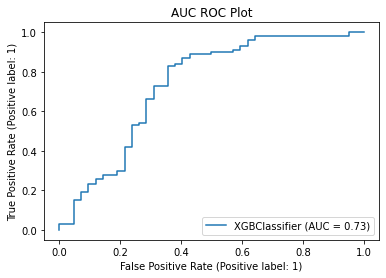

In [72]:
# auc roc plot
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

# auc roc plot
import xgboost as xgb
clf = xgb.XGBClassifier()

clf.fit(x_train, y_train)

pred = clf.predict(x_test)
plot_roc_curve(clf, x_test, y_test)
plt.title("AUC ROC Plot")
plt.show()

Final Accuracy is 80% and AUC score is 73%, which is very good.

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.55      0.61        42
           1       0.82      0.89      0.86       100

    accuracy                           0.79       142
   macro avg       0.75      0.72      0.73       142
weighted avg       0.78      0.79      0.78       142



In [74]:
# Saving the Model

import joblib
joblib.dump(clf, "Loan_Application_Status_Project.pkl")

['Loan_Application_Status_Project.pkl']